In [2]:
import pandas as pd
import math

In [3]:
main = pd.read_csv("main.csv")
main.head()

c:\Users\david\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_id,event,event_split,event_region,event_slug,event_start_date,event_end_date,event_tier,event_phase,prize_money,...,reverse_sweep_attempt,reverse_sweep,game_id,game_number,game_date,game_duration,map_id,map_name,overtime,ballchasing_id
0,614b7046f8090ec74528642d,Regional 1,Fall,Oceania,https://octane.gg/events/642d-rlcs-2021-22-fal...,2021-10-07 23:00:00+00:00,2021-10-17 22:30:00+00:00,Qualifier,Invitational Qualifier,0.0,...,False,False,616004f3143c37878b238690,1.0,2021-10-08 06:08:23+00:00,300.0,stadium_p,DFH Stadium,False,15f12bd9-f4a6-4cea-a2dc-610cd9dd976b
1,614b7046f8090ec74528642d,Regional 1,Fall,Oceania,https://octane.gg/events/642d-rlcs-2021-22-fal...,2021-10-07 23:00:00+00:00,2021-10-17 22:30:00+00:00,Qualifier,Invitational Qualifier,0.0,...,False,False,616004f7143c37878b238697,2.0,2021-10-08 06:16:09+00:00,300.0,stadium_p,DFH Stadium,False,2f01deab-3f2f-412f-a70e-72b39b3b204a
2,614b7046f8090ec74528642d,Regional 1,Fall,Oceania,https://octane.gg/events/642d-rlcs-2021-22-fal...,2021-10-07 23:00:00+00:00,2021-10-17 22:30:00+00:00,Qualifier,Invitational Qualifier,0.0,...,False,False,616004fc143c37878b23869e,3.0,2021-10-08 06:23:31+00:00,326.0,stadium_p,DFH Stadium,True,3b0fc17c-6f8d-4e94-a625-e0fa988d7cc0
3,614b7046f8090ec74528642d,Regional 1,Fall,Oceania,https://octane.gg/events/642d-rlcs-2021-22-fal...,2021-10-07 23:00:00+00:00,2021-10-17 22:30:00+00:00,Qualifier,Invitational Qualifier,0.0,...,False,False,61614e40f8090ec74528706b,1.0,2021-10-08 06:10:54+00:00,300.0,stadium_p,DFH Stadium,False,6e5e523a-3299-42d1-8b34-7ac0baa1b771
4,614b7046f8090ec74528642d,Regional 1,Fall,Oceania,https://octane.gg/events/642d-rlcs-2021-22-fal...,2021-10-07 23:00:00+00:00,2021-10-17 22:30:00+00:00,Qualifier,Invitational Qualifier,0.0,...,False,False,61614e45143c37878b2387b8,2.0,2021-10-08 06:18:58+00:00,300.0,stadium_p,DFH Stadium,False,95bfed45-3271-407b-9188-a278dfa8f66e


In [4]:
players = pd.read_csv('matches_by_players.csv')
players.head()

,match_id,team_id,team_region,player_id,player_tag,core_shots,core_goals,core_saves,core_assists,core_score,...,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,demo_inflicted,demo_taken,advanced_goal_participation,advanced_rating,score,winner
0,6159ad3d143c37878b2384a9,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae2412e,Amphis,9.0,3.0,4.0,0.0,1119.0,...,36.110946,32.808284,32.244507,35.198802,2.0,2.0,33.333333,0.863590,3.0,True
1,6159ad3d143c37878b2384a9,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae23e01,Torsos,13.0,2.0,2.0,5.0,1209.0,...,30.298075,35.344441,37.177801,32.454502,2.0,0.0,77.777778,1.350500,3.0,True
2,6159ad3d143c37878b2384a9,6020bc8ef1e4807cc700391a,Oceania,5f3d8fdd95f40596eae23e53,Express,12.0,4.0,2.0,2.0,1077.0,...,35.348030,32.218735,30.874362,34.141855,2.0,5.0,66.666667,1.232970,3.0,True
3,6159ad3d143c37878b2384a9,614c8930f8090ec745286474,Oceania,5f7ca648ea8a0f0714fb9a20,Laxin,5.0,1.0,8.0,1.0,1086.0,...,33.660595,35.306617,33.799467,36.263424,1.0,2.0,40.000000,0.806692,0.0,False
4,6159ad3d143c37878b2384a9,614c8930f8090ec745286474,Oceania,5f3d8fdd95f40596eae24503,Baked Potato,4.0,3.0,4.0,0.0,948.0,...,29.400720,35.309532,35.846261,27.821551,3.0,3.0,60.000000,1.077983,0.0,False


In [5]:
num = len(main[main['overtime'] == True])
denom = len(main)
print(f'% of games that ended in OT is {num/denom}')

% of games that ended in OT is 0.19843698764892337


In [6]:
main['map_name'].value_counts()[:10]

DFH Stadium                    6080
Mannfield (Night)              4234
Utopia Coliseum (Dusk)         1759
Forbidden Temple               1446
Champions Field                 952
Aquadome                        770
Mannfield                       457
Wasteland (Standard, Night)     442
Neo Tokyo (Standard)            348
Mannfield (Stormy)              230
Name: map_name, dtype: int64

In [7]:
main['reverse_sweep'].value_counts()

False    17435
True       863
Name: reverse_sweep, dtype: int64

In [8]:
players.columns

Index(['match_id', 'team_id', 'team_region', 'player_id', 'player_tag',
       'core_shots', 'core_goals', 'core_saves', 'core_assists', 'core_score',
       'core_shooting_percentage', 'boost_bpm', 'boost_bcpm',
       'boost_avg_amount', 'boost_amount_collected', 'boost_amount_stolen',
       'boost_amount_collected_big', 'boost_amount_stolen_big',
       'boost_amount_collected_small', 'boost_amount_stolen_small',
       'boost_count_collected_big', 'boost_count_stolen_big',
       'boost_count_collected_small', 'boost_count_stolen_small',
       'boost_amount_overfill', 'boost_amount_overfill_stolen',
       'boost_amount_used_while_supersonic', 'boost_time_zero_boost',
       'boost_percent_zero_boost', 'boost_time_full_boost',
       'boost_percent_full_boost', 'boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100', 'boost_percent_boost_0_25',
       'boost_percent_boost_25_50', 'boost_percent_boost_50_75',
       'boo

In [10]:
players[['movement_time_low_air']].mean()

movement_time_low_air    552.738505
dtype: float64

In [37]:
players.advanced_rating.median()

0.9685636445641616

In [36]:
players[players['advanced_rating'] > 1.0].shape[0]

11837

<AxesSubplot:>

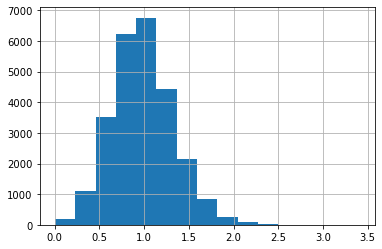

In [40]:
players.advanced_rating.hist(bins=15)

In [42]:
players[['core_goals', 'core_shots', 'advanced_rating']]

,core_goals,core_shots,advanced_rating
0,3.0,9.0,0.863590
1,2.0,13.0,1.350500
2,4.0,12.0,1.232970
3,1.0,5.0,0.806692
4,3.0,4.0,1.077983
...,...,...,...
25618,6.0,18.0,1.306242
25619,3.0,12.0,0.755061
25620,6.0,11.0,1.148616
25621,6.0,27.0,0.949304
